# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [ ]:
totalClass = 9
shufflePixels = False
shuffleLabels = False

In [ ]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(45000, 32, 32, 3)
(45000, 9)
(9000, 32, 32, 3)
(9000, 9)


Populating the interactive namespace from numpy and matplotlib


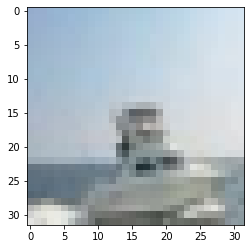

In [ ]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

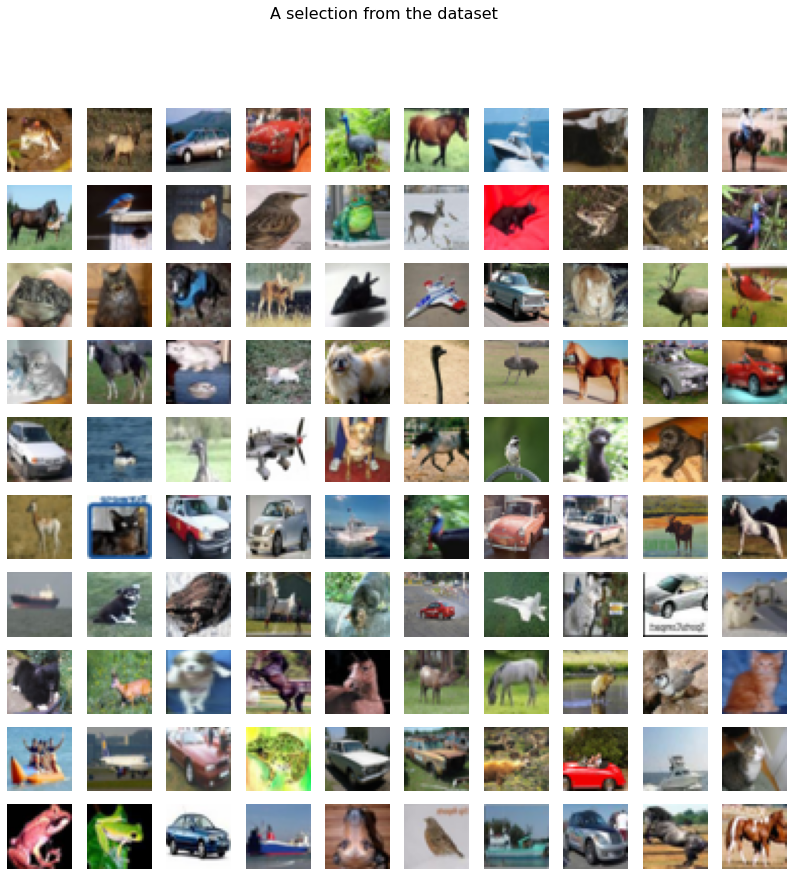

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [ ]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 13s 42ms/step - loss: 2.2023 - accuracy: 0.1115
test loss, test acc: [2.202270746231079, 0.1114666685461998]
Evaluate on test data
18/18 [==============================] - 1s 75ms/step - loss: 2.2021 - accuracy: 0.1118
test loss, test acc: [2.2021141052246094, 0.11177777498960495]


In [ ]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 15s 30ms/step - loss: 2.0161 - accuracy: 0.2451 - val_loss: 1.7431 - val_accuracy: 0.3663
Epoch 2/250
450/450 [==============================] - 13s 30ms/step - loss: 1.6906 - accuracy: 0.3832 - val_loss: 1.4813 - val_accuracy: 0.4632
Epoch 3/250
450/450 [==============================] - 13s 30ms/step - loss: 1.4666 - accuracy: 0.4682 - val_loss: 1.3214 - val_accuracy: 0.5226
Epoch 4/250
450/450 [==============================] - 13s 30ms/step - loss: 1.3244 - accuracy: 0.5250 - val_loss: 1.3200 - val_accuracy: 0.5133
Epoch 5/250
450/450 [==============================] - 13s 30ms/step - loss: 1.2100 - accuracy: 0.5633 - val_loss: 1.1651 - val_accuracy: 0.5808
Epoch 6/250
450/450 [==============================] - 13s 30ms/step - loss: 1.1019 - accuracy: 0.6084 - val_loss: 1.1108 - val_accuracy: 0.6053
Epoch 7/250
450/450 [==============================] - 13s 30ms/step - loss: 0.9914 - accuracy: 0.6482 - val_loss: 1.0609 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 3s 29ms/step - loss: 5.4629e-07 - accuracy: 1.0000
test loss, test acc: [5.462850367621286e-07, 1.0]
Evaluate on test data
18/18 [==============================] - 1s 29ms/step - loss: 2.7335 - accuracy: 0.7580
test loss, test acc: [2.733485460281372, 0.7580000162124634]


# Small

In [ ]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 8ms/step - loss: 20.9100 - accuracy: 0.1386
test loss, test acc: [20.910003662109375, 0.1386222243309021]
Evaluate on test data
18/18 [==============================] - 0s 11ms/step - loss: 20.9965 - accuracy: 0.1366
test loss, test acc: [20.996522903442383, 0.13655555248260498]


In [ ]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 4s 7ms/step - loss: 3.3619 - accuracy: 0.2462 - val_loss: 1.6357 - val_accuracy: 0.4149
Epoch 2/250
450/450 [==============================] - 3s 7ms/step - loss: 1.6362 - accuracy: 0.3911 - val_loss: 1.4543 - val_accuracy: 0.4746
Epoch 3/250
450/450 [==============================] - 3s 7ms/step - loss: 1.4799 - accuracy: 0.4560 - val_loss: 1.3270 - val_accuracy: 0.5171
Epoch 4/250
450/450 [==============================] - 3s 7ms/step - loss: 1.3766 - accuracy: 0.4982 - val_loss: 1.3280 - val_accuracy: 0.5208
Epoch 5/250
450/450 [==============================] - 3s 7ms/step - loss: 1.3081 - accuracy: 0.5240 - val_loss: 1.2336 - val_accuracy: 0.5548
Epoch 6/250
450/450 [==============================] - 3s 7ms/step - loss: 1.2393 - accuracy: 0.5534 - val_loss: 1.2072 - val_accuracy: 0.5710
Epoch 7/250
450/450 [==============================] - 3s 7ms/step - loss: 1.1857 - accuracy: 0.5746 - val_loss: 1.0798 - val_accuracy: 0.6162

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 1s 6ms/step - loss: 0.2925 - accuracy: 0.9152
test loss, test acc: [0.2924599051475525, 0.9151555299758911]
Evaluate on test data
18/18 [==============================] - 0s 6ms/step - loss: 0.6994 - accuracy: 0.7847
test loss, test acc: [0.6994287967681885, 0.7846666574478149]


#tNet

In [ ]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [ ]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 5s 46ms/step - loss: 3.3768 - accuracy: 0.1183
test loss, test acc: [3.376765727996826, 0.11826666444540024]
Evaluate on test data
18/18 [==============================] - 1s 62ms/step - loss: 3.3866 - accuracy: 0.1169
test loss, test acc: [3.386610269546509, 0.11688888818025589]


In [ ]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 20s 40ms/step - loss: 1.7892 - accuracy: 0.3712 - val_loss: 1.5084 - val_accuracy: 0.4684
Epoch 2/250
450/450 [==============================] - 17s 39ms/step - loss: 1.3981 - accuracy: 0.5056 - val_loss: 1.3587 - val_accuracy: 0.5183
Epoch 3/250
450/450 [==============================] - 17s 39ms/step - loss: 1.1813 - accuracy: 0.5852 - val_loss: 1.5120 - val_accuracy: 0.4861
Epoch 4/250
450/450 [==============================] - 17s 39ms/step - loss: 1.0017 - accuracy: 0.6503 - val_loss: 1.1195 - val_accuracy: 0.6073
Epoch 5/250
450/450 [==============================] - 17s 39ms/step - loss: 0.8451 - accuracy: 0.7094 - val_loss: 1.1992 - val_accuracy: 0.5910
Epoch 6/250
450/450 [==============================] - 17s 39ms/step - loss: 0.7053 - accuracy: 0.7614 - val_loss: 1.1932 - val_accuracy: 0.6050
Epoch 7/250
450/450 [==============================] - 17s 39ms/step - loss: 0.5703 - accuracy: 0.8125 - val_loss: 1.1972 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 3s 39ms/step - loss: 0.0031 - accuracy: 0.9994
test loss, test acc: [0.0031278326641768217, 0.9993777871131897]
Evaluate on test data
18/18 [==============================] - 1s 38ms/step - loss: 2.1033 - accuracy: 0.6826
test loss, test acc: [2.103304147720337, 0.6825555562973022]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [ ]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 8s 67ms/step - loss: 4.2720 - accuracy: 0.0919
test loss, test acc: [4.271989345550537, 0.09186666458845139]
Evaluate on test data
18/18 [==============================] - 2s 116ms/step - loss: 4.2789 - accuracy: 0.0952
test loss, test acc: [4.27891731262207, 0.09522221982479095]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
450/450 [==============================] - 19s 39ms/step - loss: 1.6659 - accuracy: 0.3822 - val_loss: 1.4120 - val_accuracy: 0.4602
Epoch 2/250
450/450 [==============================] - 17s 38ms/step - loss: 1.2504 - accuracy: 0.5397 - val_loss: 1.2116 - val_accuracy: 0.5479
Epoch 3/250
450/450 [==============================] - 17s 38ms/step - loss: 1.0696 - accuracy: 0.6096 - val_loss: 1.1390 - val_accuracy: 0.5929
Epoch 4/250
450/450 [==============================] - 17s 38ms/step - loss: 0.9433 - accuracy: 0.6600 - val_loss: 1.3041 - val_accuracy: 0.5434
Epoch 5/250
450/450 [==============================] - 17s 38ms/step - loss: 0.8547 - accuracy: 0.6941 - val_loss: 0.9039 - val_accuracy: 0.6839
Epoch 6/250
450/450 [==============================] - 17s 38ms/step - loss: 0.7801 - accuracy: 0.7235 - val_loss: 0.8168 - val_accuracy: 0.7174
Epoch 7/250
450/450 [==============================] - 17s 38ms/step - loss: 0.7172 - accuracy: 0.7440 - val_loss: 0.8139 - val_ac

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
88/88 [==============================] - 4s 46ms/step - loss: 4.1854e-04 - accuracy: 0.9999
test loss, test acc: [0.00041854451410472393, 0.9998666644096375]
Evaluate on test data
18/18 [==============================] - 1s 45ms/step - loss: 1.2108 - accuracy: 0.8418
test loss, test acc: [1.2107640504837036, 0.8417778015136719]


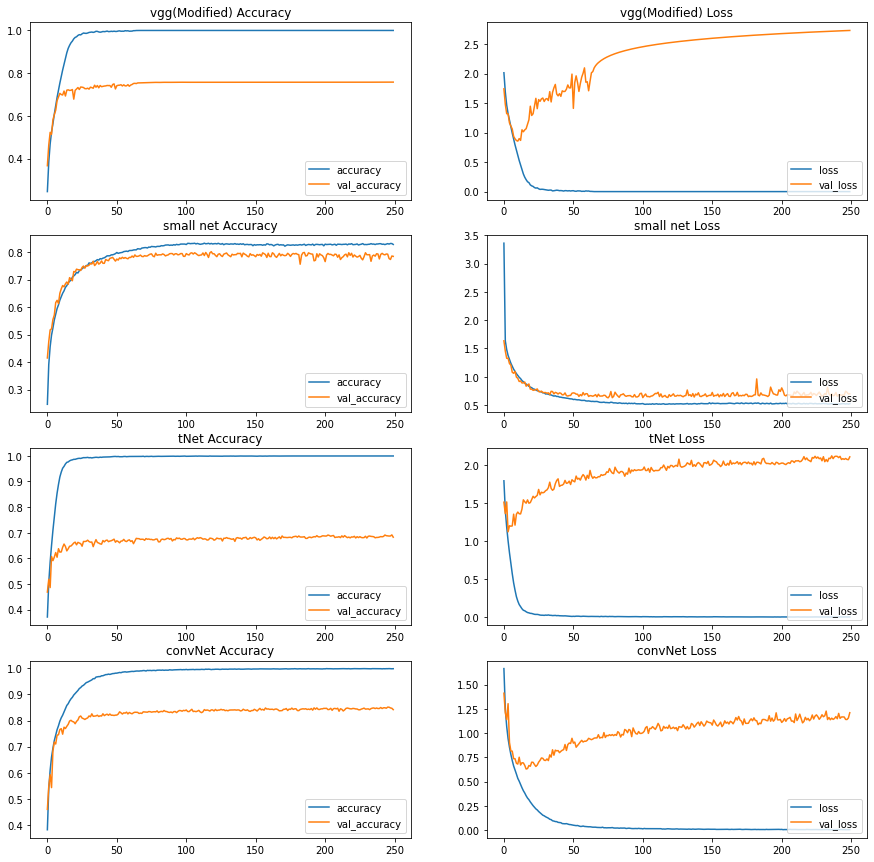

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1